Importing the Dependencies

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Importing Models

In [108]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Import The Data

In [109]:
data = pd.read_csv('/content/heart_disease_data.csv')

In [110]:
# top 5 recods
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
# data shape
data.shape

(303, 14)

In [112]:
#check null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [113]:
#check target categories
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 ---------> Defective Heart

0 ---------> Healthy heart

In [114]:
# statistical measures
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [115]:
# correlations of data
correlation = data.corr()

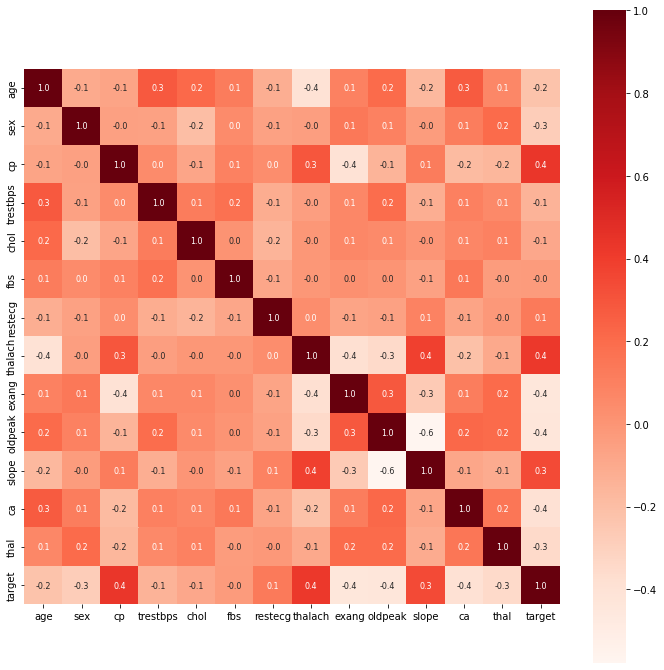

In [116]:
# show the data in heatmap
plt.figure(figsize=(12,12))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [117]:
# standardization
data.std()

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

In [118]:
X = data.drop(columns=['target'],axis=1)

In [119]:
Y = data['target']

In [120]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [121]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Train Test Split

In [122]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [123]:
print(X_train.shape,X_test.shape,data.shape)

(242, 13) (61, 13) (303, 14)


models

In [124]:
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),RandomForestClassifier(),KNeighborsClassifier()]

In [125]:
def comapare_model_train_test():


  for model in models:

    model.fit(X_train, Y_train)

    test_data_pred = model.predict(X_train)

    accuracy = accuracy_score(test_data_pred,Y_train)

    print('accuracy_score_of_model :',model, ':', accuracy)
comapare_model_train_test()

accuracy_score_of_model : LogisticRegression(max_iter=1000) : 0.8553719008264463
accuracy_score_of_model : SVC(kernel='linear') : 0.8553719008264463
accuracy_score_of_model : RandomForestClassifier() : 1.0
accuracy_score_of_model : KNeighborsClassifier() : 0.78099173553719


## Cross_Validation

In [126]:
#LLogistic Regression cross val
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000),X,Y,cv=5)

In [127]:
print(cv_score_lr)

[0.80327869 0.8852459  0.85245902 0.86666667 0.75      ]


In [128]:
cv_mean = sum(cv_score_lr)/len(cv_score_lr)

cv_mean_pct = cv_mean*100

cv_mean_acc = round(cv_mean_pct,2)

print('Logistic Regression accuracy :',cv_mean_acc)

Logistic Regression accuracy : 83.15


In [129]:
# support vector Classifier
cv_score_lr = cross_val_score(SVC(kernel='linear'),X,Y,cv=5)

cv_mean = sum(cv_score_lr)/len(cv_score_lr)

cv_mean_pct = cv_mean*100

cv_mean_acc = round(cv_mean_pct,2)

print('support vector classifier accuracy : ',cv_mean_acc)

support vector classifier accuracy :  82.83


Cross Validation Models

In [135]:
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),RandomForestClassifier(),KNeighborsClassifier()]

def comapare_model_cross_val():

  for model in models:
     # cross validation statement
    cv_score_model = cross_val_score(model,X,Y,cv=5)

    cv_score_mean = sum(cv_score_model)/len(cv_score_model)

    cv_score_mean_pct = cv_score_mean*100

    cv_score_mean_acc = round(cv_score_mean_pct,2)

    print('support vector classifier accuracy : ',model, ' ', cv_score_model)
    print('Accuracy % of the',model,' ',cv_score_mean_acc)
    print('----------------------------------------------------------------')
comapare_model_cross_val()


support vector classifier accuracy :  LogisticRegression(max_iter=1000)   [0.80327869 0.8852459  0.85245902 0.86666667 0.75      ]
Accuracy % of the LogisticRegression(max_iter=1000)   83.15
----------------------------------------------------------------
support vector classifier accuracy :  SVC(kernel='linear')   [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy % of the SVC(kernel='linear')   82.83
----------------------------------------------------------------
support vector classifier accuracy :  RandomForestClassifier()   [0.83606557 0.90163934 0.75409836 0.85       0.8       ]
Accuracy % of the RandomForestClassifier()   82.84
----------------------------------------------------------------
support vector classifier accuracy :  KNeighborsClassifier()   [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy % of the KNeighborsClassifier()   64.39
----------------------------------------------------------------
